# Sensitivity analysis for Bayesian networks using credal networks

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://pyagrum.gitlab.io) |[ ![interactive online version](images/atbinder.svg)](https://mybinder.org/v2/gl/agrumery%2FaGrUM/forBinder?urlpath=%2Fdoc%2Ftree%2Fwrappers%2Fpyagrum%2Fdoc%2Fsphinx%2Fnotebooks%2F14-Examples_SensitivityAnalysisUsingCredalNetworks.ipynb)

There are several sensitivity analysis frameworks for Bayesian networks. A fairly efficient method is certainly to use credal networks to do this analysis.

## Creating a Bayesian network

In [1]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

In [2]:
bn = gum.fastBN("A->B->C<-D->E->F<-B")
gnb.flow.row(bn, gnb.getInference(bn))

## Building a credal network from a BN

It is easy to build a credal network from a Bayesian network by indicating the 'noise' on each parameter.

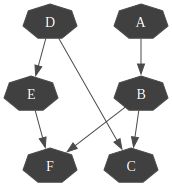

In [3]:
cr = gum.CredalNet(bn, bn)
gnb.show(cr)

In [4]:
cr.bnToCredal(1e-10, False, False)

In [5]:
cr.computeBinaryCPTMinMax()

In [6]:
print(cr)


A:Range([0,1])
<> : [[0.960602 , 0.0393976]]

B:Range([0,1])
<A:0> : [[0.656802 , 0.343198] , [0.656793 , 0.343207]]
<A:1> : [[0.929183 , 0.0708164]]

C:Range([0,1])
<B:0|D:0> : [[0.796228 , 0.203772] , [0.796227 , 0.203773]]
<B:1|D:0> : [[0.296307 , 0.703693] , [0.293682 , 0.706318]]
<B:0|D:1> : [[0.866449 , 0.13355]]
<B:1|D:1> : [[0.365068 , 0.634932] , [0.364288 , 0.635712]]

D:Range([0,1])
<> : [[0.296323 , 0.703677] , [0.293699 , 0.706301]]

E:Range([0,1])
<D:0> : [[0.216518 , 0.783482] , [0.203086 , 0.796914]]
<D:1> : [[0.314793 , 0.685207] , [0.312918 , 0.687082]]

F:Range([0,1])
<E:0|B:0> : [[0.439406 , 0.560594] , [0.439178 , 0.560822]]
<E:1|B:0> : [[0.56696 , 0.43304] , [0.566927 , 0.433073]]
<E:0|B:1> : [[0.608625 , 0.391375] , [0.00899224 , 0.991008]]
<E:1|B:1> : [[0.887344 , 0.112656]]




## Testing difference hypothesis about the global precision on the parameters

We can therefore easily conduct a sensitivity analysis based on an assumption of error on all the parameters of the network.

In [7]:
def showNoisy(bn, beta):
  cr = gum.CredalNet(bn, bn)
  cr.bnToCredal(beta, False, False)
  cr.computeBinaryCPTMinMax()
  ielbp = gum.CNLoopyPropagation(cr)
  return gnb.getInference(cr, engine=ielbp)

In [8]:
for eps in [1, 1e-1, 1e-2, 1e-3, 1e-10]:
  gnb.flow.add(showNoisy(bn, eps), caption=f"noise={eps}")
gnb.flow.display()